In [ ]:
#automated had written numbers prediction prediction


path = '/img/numbers'
def num_prediction(path):
    
    #looping throught hte images
    plt.figure(figsize=(5,20))
    for i in range(3):
        img_read = cv2.imread(path + str(i) + '.jpg',0)
        plt.subplot(1,4,i+1)    
        plt.imshow(img_read, cmap='gray')
    
    
    #model selection
    model = joblib.load('minst_XGboost.sav')
    
    #read image
    img = cv2.imread(path,0) 
    copy = img.copy()
    
    #preprocessing image
    th =cv2.adapptiveThreshold(copy, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV, 199, 21)
    kernel = np.ones((3,3), np.uint8)
    dilated = cv2.dilate(th,kernel, iterations= 25)
    cnt ,h = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    x,y,w,h, = cv2.boundingRect(cnt)
    img = dilated[x:x+h,y:w+h]
    img_resized = cv2.resize(th,(28,28),interpolation= cv2.INTER_AREA)
    
    #prediction
    img_arr = dilated.flatten().reshape(1,784)
    
    return model.predict(img_arr)

In [1]:
import numpy as np
import joblib
from xgboost import XGBClassifier
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
num_prediction(path)

In [ ]:
#looping throught hte images
path = 'img/numbers/'
plt.figure(figsize=(5,20))
for i in range(3):
    img_read = cv2.imread(path + str(i) + '.jpg',0)
    plt.subplot(1,4,i+1)    
    plt.imshow(img_read, cmap='gray')

In [5]:
def longest_contour(cnt):
    longest = 0
    for i in range(len(cnt)):
        if len(cnt[i]) > longest:
            longest = len(cnt[i])
            index = i
    return cnt[index]


In [11]:
print(len(longest_contour(cnt)))
print(longest_contour(cnt))

2467
[[[1912 1674]]

 [[1911 1675]]

 [[1899 1675]]

 ...

 [[1916 1676]]

 [[1915 1675]]

 [[1913 1675]]]


array([1], dtype=int64)

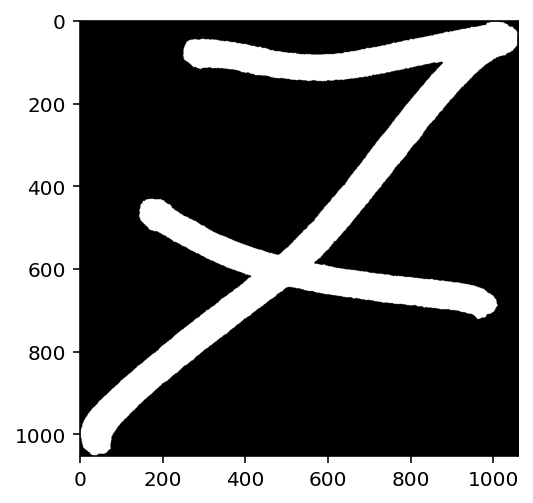

In [6]:

path = 'img/numbers/0.jpg'
img = cv2.imread(path,0) 
copy = img.copy()

#preprocessing image
ret, th =cv2.threshold(copy, 127, 255,cv2.THRESH_BINARY_INV)
# kernel = np.ones((2,2), np.uint8)
# dilated = cv2.dilate(th,kernel, iterations= 1)
cnt ,h = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
x,y,w,h, = cv2.boundingRect(longest_contour(cnt))
img_cropped = th[y:y+h,x:x+w]
plt.imshow(img_cropped, cmap='gray')
img_resized = cv2.resize(th,(28,28),interpolation= cv2.INTER_AREA)

#prediction
img_arr = img_resized.flatten().reshape(1,784)
#model selection
model = joblib.load('minst_XGboost.sav')
model.predict(img_arr)


In [ ]:
plt.imshow(dilated, cmap='gray')
x

In [ ]:
w